In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
x_data = np.array(
    [
        [100, 4],
        [50, 1],
        [100, 4],
        [100, 3],
        [50, 2],
        [80, 2],
        [75, 3],
        [65, 4],
        [90, 3],
        [90, 2],
    ]
)

y_data = np.array([9.3, 4.8, 8.9, 6.5, 4.2, 6.2, 7.4, 6.0, 7.6, 6.1])

In [15]:
data = np.array(
    [
        [0.067732, 3.176513],
        [0.427810, 3.816464],
        [0.995731, 4.550095],
        [0.738336, 4.256571],
        [0.981083, 4.560815],
        [0.526171, 3.929515],
        [0.378887, 3.526170],
        [0.033859, 3.156393],
        [0.132791, 3.110301],
        [0.138306, 3.149813],
        [0.247809, 3.476346],
        [0.648270, 4.119688],
        [0.731209, 4.282233],
        [0.236833, 3.486582],
        [0.969788, 4.655492],
        [0.607492, 3.965162],
        [0.358622, 3.514900],
        [0.147846, 3.125947],
        [0.637820, 4.094115],
        [0.230372, 3.476039],
        [0.070237, 3.210610],
        [0.067154, 3.190612],
        [0.925577, 4.631504],
        [0.717733, 4.295890],
        [0.015371, 3.085028],
        [0.335070, 3.448080],
        [0.040486, 3.167440],
        [0.212575, 3.364266],
        [0.617218, 3.993482],
        [0.541196, 3.891471],
    ]
)

In [16]:
X = data[:, 0:1]
y = data[:, 1]

In [17]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
model.fit(X=X,y=y)

LinearRegression(n_jobs=1)

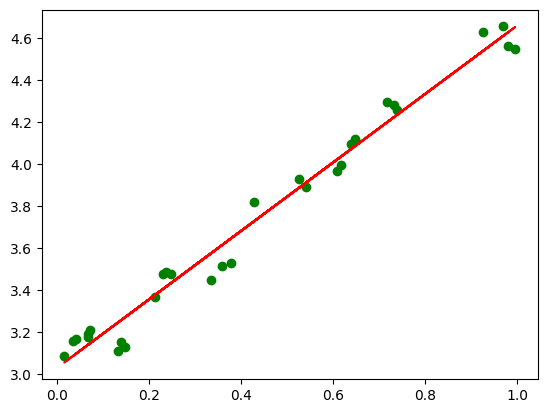

In [18]:
#visulize the result
plt.figure()
plt.scatter(X, y, color='green')
plt.plot(X, model.predict(X), color='red')
plt.show()

In [19]:
model.fit(x_data, y_data)

LinearRegression(n_jobs=1)

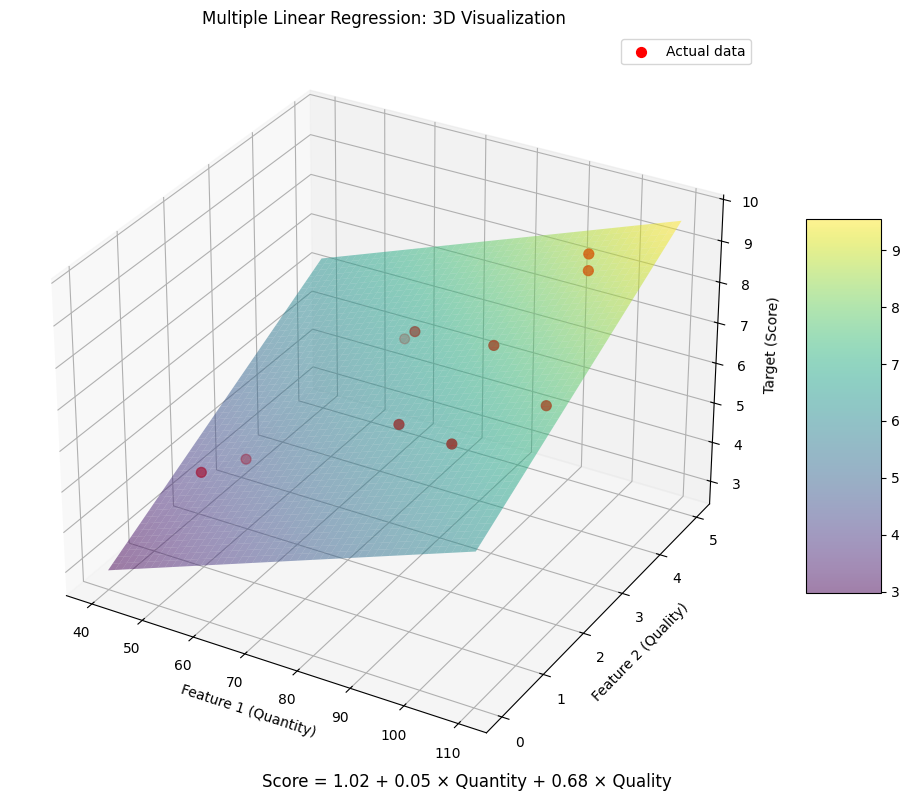

Model intercept: 1.0242
Coefficients: Quantity = 0.0470, Quality = 0.6836
R-squared: 0.7893
Mean Squared Error: 0.5036
Prediction for [80  3]: 6.84
Prediction for [60  2]: 5.21
Prediction for [100   4]: 8.46


In [ ]:
# Complete the 3D visualization for the multiple regression model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the features for easier plotting
feature1 = x_data[:, 0]  # First feature (quantity)
feature2 = x_data[:, 1]  # Second feature (quality)
x1_range = np.linspace(min(feature1) - 10, max(feature1) + 10, 50)
x2_range = np.linspace(min(feature2) - 1, max(feature2) + 1, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
x_mesh = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten()))
y_pred_mesh = model.predict(x_mesh).reshape(x1_mesh.shape)
surface = ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, alpha=0.5, cmap='viridis', edgecolor='none')
ax.scatter(feature1, feature2, y_data, color='red', s=50, label='Actual data')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Feature 1 (Quantity)')
ax.set_ylabel('Feature 2 (Quality)')
ax.set_zlabel('Target (Score)')
ax.set_title('Multiple Linear Regression: 3D Visualization')
intercept = model.intercept_
coef1, coef2 = model.coef_
equation = f'Score = {intercept:.2f} + {coef1:.2f} × Quantity + {coef2:.2f} × Quality'
plt.figtext(0.5, 0.01, equation, ha='center', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

# Print the model coefficients and performance metrics
print(f"Model intercept: {model.intercept_:.4f}")
print(f"Coefficients: Quantity = {model.coef_[0]:.4f}, Quality = {model.coef_[1]:.4f}")

# Calculate and print R-squared
y_pred = model.predict(x_data)
r2 = metrics.r2_score(y_data, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate Mean Squared Error
mse = metrics.mean_squared_error(y_data, y_pred)
print(f"Mean Squared Error: {mse:.4f}")